## Visualise Graphs for Joint Data

In [1]:
from interp.dataset import HDF5Dataset
from interp.dataset import nested_custom_collate
from torch.utils.data import DataLoader
import os

USE_SYNC = True

algorithms = ["dijkstra", "bfs"]
if USE_SYNC:
    save_root = os.path.join("data", "_".join(algorithms) + "_sync")
else:
    save_root = os.path.join("data", "_".join(algorithms))

save_name = "interp_data_all"

# Load the saved datasets
train_dataset = HDF5Dataset(os.path.join(save_root, save_name + ".h5"), nested=True)
val_dataset = HDF5Dataset(os.path.join(save_root, save_name + "_eval.h5"), nested=True)

# Create DataLoaders
batch_size = 4
train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    collate_fn=nested_custom_collate
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    collate_fn=nested_custom_collate
)

# Print some information about the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

# Check the first batch
sample_batch = next(iter(train_loader))
print("Sample batch keys:", sample_batch.keys())

for key in sample_batch.keys():
    algo_input = sample_batch[key]
    for field in algo_input.keys():
        print("algo", key, field, algo_input[field].shape)

Training dataset size: 31
Validation dataset size: 8
Sample batch keys: dict_keys(['bfs', 'dijkstra'])
algo bfs batch torch.Size([38])
algo bfs num_graphs torch.Size([])
algo bfs num_nodes_per_graph torch.Size([4])
algo bfs all_cumsum torch.Size([5])
algo bfs edge_weights torch.Size([38, 38])
algo bfs graph_adj torch.Size([38, 38])
algo bfs gt_pi torch.Size([38])
algo bfs hidden_states torch.Size([16, 128, 38])
algo bfs timesteps_per_graph torch.Size([4])
algo bfs all_cumsum_timesteps torch.Size([5])
algo bfs start_node torch.Size([38])
algo bfs upd_d torch.Size([16, 38])
algo bfs upd_pi torch.Size([16, 38])
algo dijkstra batch torch.Size([38])
algo dijkstra num_graphs torch.Size([])
algo dijkstra num_nodes_per_graph torch.Size([4])
algo dijkstra all_cumsum torch.Size([5])
algo dijkstra edge_weights torch.Size([38, 38])
algo dijkstra graph_adj torch.Size([38, 38])
algo dijkstra gt_pi torch.Size([38])
algo dijkstra hidden_states torch.Size([34, 128, 38])
algo dijkstra timesteps_per_grap

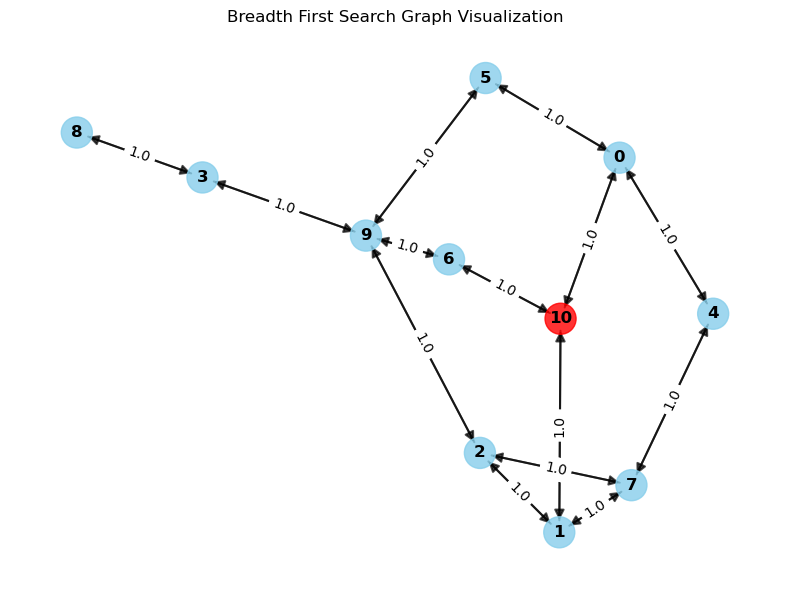

upd_d
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)
upd_pi
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [10., 10.,  2.,  3.,  4.,  5., 10.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  1.,  3.,  0.,  0.,  6.,  1.,  8.,  6., 10.],
        [ 0.,  1.,  2.,  9.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  3.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],
       dtype=torch.float64)
hiddens
tensor([[[-2.9339e-02,  4.6370e-02,  1.2208e-01,  ...,  5.7634e-01,
           6.5205e-01,  1.4323e+00],
         [ 3.4612e-03,  3.0637e-02,  5.7813e-02,  ...,  2.2087e-01,
           2.4804e-01, -2.0483e+00],
    

In [8]:
from interp.visualisation import visualize_graph
import matplotlib.pyplot as plt
import random

random_idx = random.randint(0, len(train_dataset)-1)
datapoint = train_dataset[random_idx]
# Example usage
fig, ax = visualize_graph(datapoint['bfs'], title="Breadth First Search Graph Visualization")
plt.show()
print("upd_d")
print(datapoint['bfs']['upd_d'])
print("upd_pi")
print(datapoint['bfs']['upd_pi'])
print("hiddens")
print(datapoint['bfs']['hidden_states'])

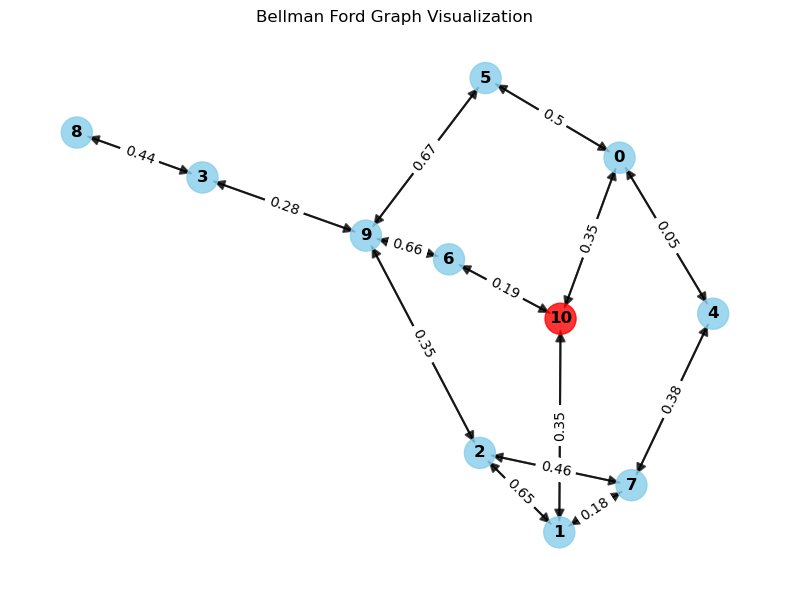

upd_d
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.3504, 0.3491, 0.0000, 0.0000, 0.0000, 0.0000, 0.1864, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.8464, 0.0000],
        [0.0000, 0.0000, 1.0022, 0.0000, 0.0000, 0.0000, 0.0000, 0.5264, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3965, 0.8505, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.9862, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.1300, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000

In [9]:
fig, ax = visualize_graph(datapoint['dijkstra'], title="Bellman Ford Graph Visualization")
plt.show()
print("upd_d")
print(datapoint['dijkstra']['upd_d'])
print("upd_pi")
print(datapoint['dijkstra']['upd_pi'])
print("edge_weights")
print(datapoint['dijkstra']['edge_weights'].shape)

In [32]:
# Testing if samples are synchronous
# i.e. same graph structure per instance
(sample_batch['bellman_ford']['graph_adj'] == sample_batch['bfs']['graph_adj']).all()

tensor(False)

# Visualise single algorithm Data

In [1]:
# Load the saved dataset and check shapes after collation
import os
from interp.dataset import custom_collate
from torch.utils.data import DataLoader
from interp.dataset import HDF5Dataset

alg = "dijkstra"
save_root = os.path.join("data", alg)
save_name = "interp_data_all"

# Load the saved datasets
train_dataset = HDF5Dataset(os.path.join(save_root, save_name + ".h5"))
val_dataset = HDF5Dataset(os.path.join(save_root, save_name + "_eval.h5"))

# Create dataloaders with the custom_collate function
batch_size = 4  # Small batch size for demonstration
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

# Get a sample batch from the dataloader
sample_batch = next(iter(train_dataloader))

# Print the shapes of each entry in the batch
print("Sample batch shapes after collation:")
for key, value in sample_batch.items():
    if hasattr(value, 'shape'):
        print(f"{key}: {value.shape}")
    elif isinstance(value, list):
        print(f"{key}: list of length {len(value)}")
    else:
        print(f"{key}: {type(value)}")

# Close the HDF5 files when done
train_dataset.close()
val_dataset.close()


Sample batch shapes after collation:
batch: torch.Size([49])
num_graphs: torch.Size([])
num_nodes_per_graph: torch.Size([4])
all_cumsum: torch.Size([5])
edge_weights: torch.Size([49, 49])
graph_adj: torch.Size([49, 49])
gt_pi: torch.Size([49])
hidden_states: torch.Size([38, 128, 49])
timesteps_per_graph: torch.Size([4])
all_cumsum_timesteps: torch.Size([5])
start_node: torch.Size([49])
upd_d: torch.Size([38, 49])
upd_pi: torch.Size([38, 49])


In [42]:
from interp.visualisation import visualize_graph
import matplotlib.pyplot as plt
import random

random_idx = random.randint(0, len(train_dataset)-1)
datapoint = train_dataset[random_idx]
# Example usage
#fig, ax = visualize_graph(datapoint, title="Bellman Ford Graph Visualization")
#plt.show()
print(datapoint['upd_d'])
print(datapoint['upd_pi'])
print(datapoint['upd_d'].shape)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5850, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.7353, 0.0000]])
tensor([[0, 1, 2, 3, 4],
        [1, 1, 2, 3, 4],
        [0, 1, 2, 0, 4]], dtype=torch.int8)
torch.Size([3, 5])
